In [1]:
import numpy as np
import pandas as pd
import re
from sklearn.model_selection import train_test_split
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('tagsets')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import seaborn as sns

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package tagsets to /root/nltk_data...
[nltk_data]   Unzipping help/tagsets.zip.


In [2]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


In [3]:
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/ironhack-final-project')

In [4]:
import you_nlp

In [5]:
data = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/raw_data/USvideos_final_cleaned.csv")

In [6]:
data_nlp, frq = you_nlp.get_key_words(data, "en")

In [7]:
stop_words = list(stopwords.words('english')) 

In [8]:
key_word_df, final_freq = you_nlp.create_keywords_df(data_nlp, frq, stop_words, "US_EN")

In [9]:
final_freq

[('new', 22529),
 ('music', 20940),
 ('nfollow', 17826),
 ('video', 16984),
 ('youtube', 14179),
 ('news', 13975),
 ('instagram', 11949),
 ('makeup', 11611),
 ('facebook', 11608),
 ('live', 11010),
 ('ntwitter', 10859),
 ('subscribe', 10741),
 ('ninstagram', 10652),
 ('nsubscribe', 10125),
 ('nfacebook', 9740),
 ('best', 9158),
 ('movie', 8160),
 ('late', 8118),
 ('nthe', 7290),
 ('nwatch', 6947),
 ('full', 6717),
 ('com', 6677),
 ('comedy', 6636),
 ('use', 6272),
 ('every', 6122),
 ('entertainment', 6100),
 ('james', 5567),
 ('nlike', 5449),
 ('film', 5356),
 ('nget', 5164),
 ('nbc', 5132),
 ('jimmy', 5081),
 ('series', 4787),
 ('follow', 4752),
 ('thing', 4696),
 ('cat', 4681),
 ('iphone', 4649),
 ('free', 4645),
 ('nmusic', 4621),
 ('latest', 4260),
 ('big', 4174),
 ('sport', 4171),
 ('team', 4037),
 ('cbs', 4028),
 ('made', 4024),
 ('celebrity', 4016),
 ('online', 4007),
 ('got', 3999),
 ('ncheck', 3907),
 ('ever', 3811),
 ('also', 3787)]

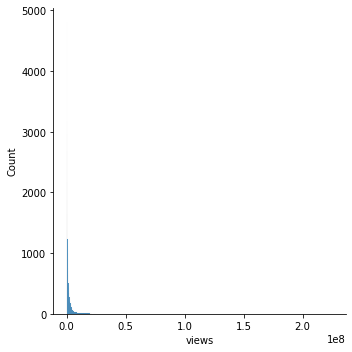

In [10]:
sns.displot(key_word_df["views"])

In [11]:
key_word_df_outl = you_nlp.remove_outliers(key_word_df)

category_id
8.0
37.0
5.0
views
1570313.5
4172053.75
-2109200.25
likes
49497.5
129328.75
-68661.25
dislikes
1720.5
4505.25
-2376.75
comment_count
5109.0
13396.5
-7039.5
likes_rate
0.031631807413482704
0.09444832665172831
-0.03207890300220251
dislikes_rate
0.0010329435194047002
0.0031390445040914003
-0.0009927295735274002
new
1.0
2.5
-1.5
music
nfollow
1.0
2.5
-1.5
video
2.0
5.0
-3.0
youtube
news
instagram
makeup
facebook
live
ntwitter
subscribe
ninstagram
nsubscribe
nfacebook
best
movie
late
nthe
nwatch
full
com
comedy
use
every
entertainment
james
nlike
film
nget
nbc
jimmy
series
follow
thing
cat
iphone
free
nmusic
latest
big
sport
team
cbs
made
celebrity
online
got
ncheck
ever
also
0 rows have been removed, 0.0% in total


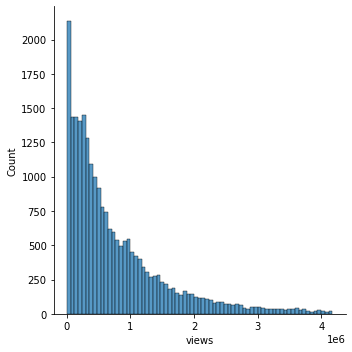

In [12]:
sns.displot(key_word_df_outl["views"])

In [13]:
key_word_df_outl["views"].describe()

count    2.323000e+04
mean     7.602387e+05
std      7.779217e+05
min      5.490000e+02
25%      2.108082e+05
50%      4.945510e+05
75%      1.053418e+06
max      4.170378e+06
Name: views, dtype: float64

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


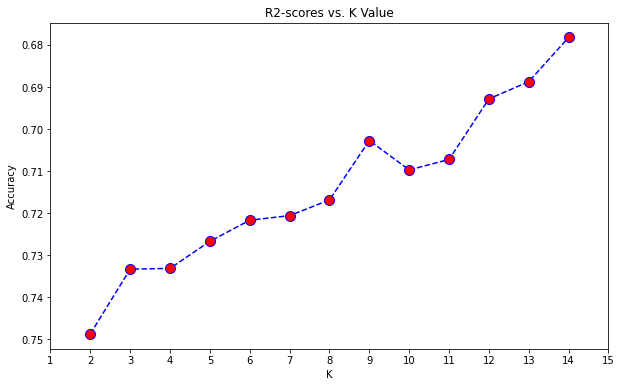

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8454723213479418
MSE: 7688474659.744154
RMSE: 87683.94756022423
MAE: 18406.588285086655
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.8119930879072952
MSE: 10756121788.95954
RMSE: 103711.72445273263
MAE: 21872.411271275298
-----------------------------
Filename Linear: US_EN_Likes_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.07661155560483401
MSE: 45942893323.45605
RMSE: 214342.93392471806
MAE: 85581.6097598952
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.07987243861554538
MSE: 52641703443.059586
RMSE: 229437.79863627438
MAE: 87404.94932892112
-----------------------------
Filename Linear: US_EN_Likes_linea

In [14]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes", "US_EN_Likes")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


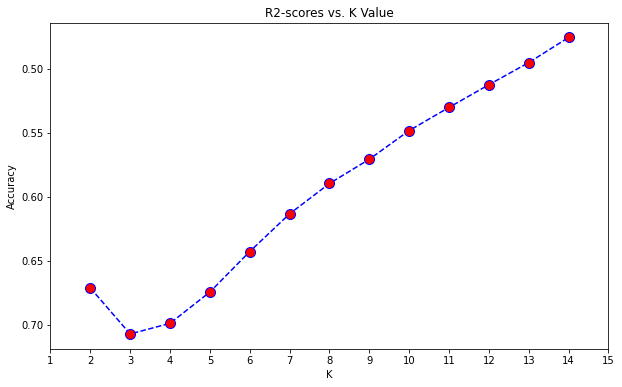

Please enter k:3


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8718260754635441
MSE: 80122199.41919148
RMSE: 8951.100458557677
MAE: 4068.301358601785
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7902892837486194
MSE: 127845942.89458229
RMSE: 11306.89802264893
MAE: 5114.611092244218
-----------------------------
Filename Linear: US_EN_Likes_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.09856514790727755
MSE: 563491702.7311577
RMSE: 23737.980173788117
MAE: 17208.64144447867
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.08177317178373356
MSE: 559778616.6716094
RMSE: 23659.64109346567
MAE: 17049.746005068595
-----------------------------
Filename Linear: US_EN_Likes_Out

In [15]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes", "US_EN_Likes_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


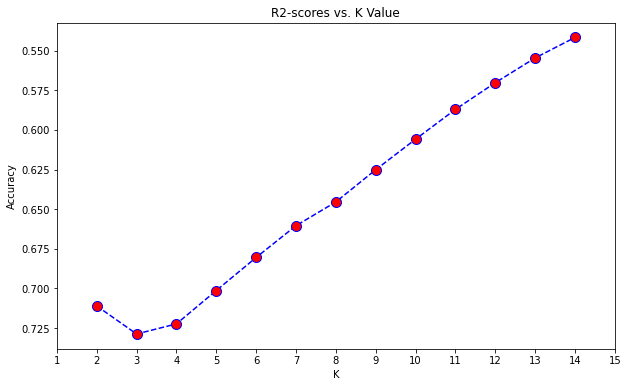

Please enter k:3


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.8465848312171826
MSE: 0.00011306370153885302
RMSE: 0.010633141658929078
MAE: 0.005024582209026244
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7949438432902199
MSE: 0.00014470670426959897
RMSE: 0.012029409971798242
MAE: 0.006013823398763488
-----------------------------
Filename Linear: US_EN_Likes_Rate_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.18851161217317625
MSE: 0.0005980496036437114
RMSE: 0.024455052722161762
MAE: 0.017420768000234343
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.1822557330552923
MSE: 0.0005770764443440092
RMSE: 0.024022415456069552
MAE: 0.017255751596437552
-----------------------

In [16]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "likes_rate", "US_EN_Likes_Rate")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


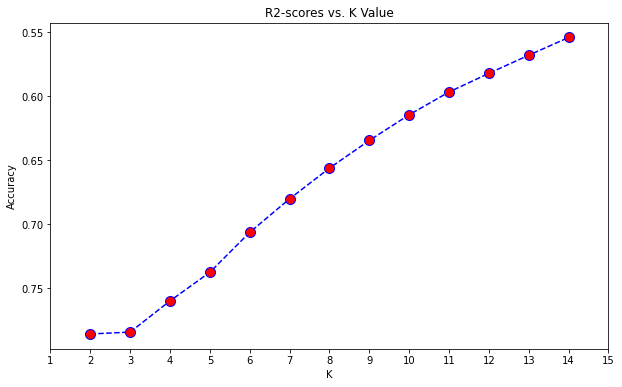

Please enter k:3


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.888005156479857
MSE: 4.8022539932040594e-05
RMSE: 0.00692982971883441
MAE: 0.003772008181645984
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.8420776686670954
MSE: 6.774999468558682e-05
RMSE: 0.008231038493749548
MAE: 0.00454162009120081
-----------------------------
Filename Linear: US_EN_Likes_Rate_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.24335840534443898
MSE: 0.00032444218011746503
RMSE: 0.018012278593155975
MAE: 0.0141718933018398
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.22690177668251732
MSE: 0.00033166557306441404
RMSE: 0.018211687814818647
MAE: 0.014311204661706609
----------------------

In [17]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "likes_rate", "US_EN_Likes_Rate_Out")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


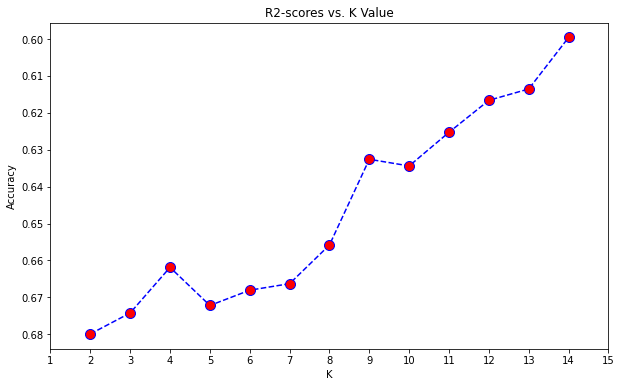

Please enter k:5


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.7806747370188412
MSE: 11700286994935.861
RMSE: 3420568.226908486
MAE: 785603.0105317597
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7422803938523046
MSE: 13080922546590.18
RMSE: 3616755.804113706
MAE: 903009.446186654
-----------------------------
Filename Linear: US_EN_Views_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.06259988102674352
MSE: 50007237068792.734
RMSE: 7071579.531391324
MAE: 2620182.9833807456
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.06530332740243094
MSE: 47441849541696.95
RMSE: 6887804.406463424
MAE: 2596297.4254173297
-----------------------------
Filename Linear: US_EN_Views_linear.

In [20]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df, "views", "US_EN_Views")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


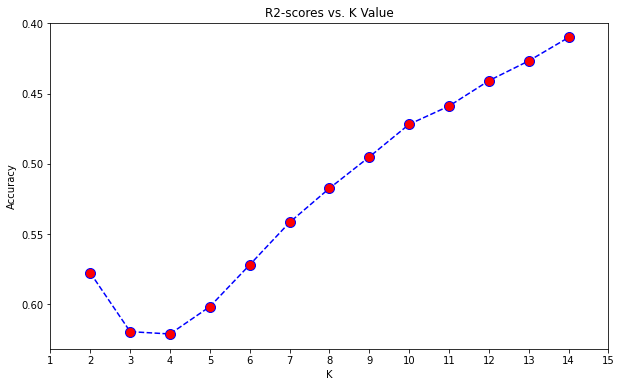

Please enter k:4


/content/drive/MyDrive/Colab Notebooks/ironhack-final-project/you_nlp.py:166: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train, y_train)


-----------------------------
--------Random Forest--------
----------Train Set----------
-----------------------------
R2: 0.7867446431457581
MSE: 130948182138.64636
RMSE: 361867.63068647956
MAE: 190642.67880395576
-----------------------------
--------Random Forest--------
-----------Test Set----------
-----------------------------
R2: 0.7218255669093718
MSE: 162536203196.02472
RMSE: 403157.78945225
MAE: 224406.35090180117
-----------------------------
Filename Linear: US_EN_Views_Out_random_forest.sav
-----------------------------
------Linear Regression------
----------Train Set----------
-----------------------------
R2: 0.06105126572094033
MSE: 576555879715.9006
RMSE: 759312.7680448293
MAE: 565737.8008563516
-----------------------------
------Linear Regression------
-----------Test Set----------
-----------------------------
R2: 0.04396659361634192
MSE: 558606476791.26
RMSE: 747399.8105373456
MAE: 560880.8099107804
-----------------------------
Filename Linear: US_EN_Views_Out_l

In [22]:
X_train, y_train, X_test, y_test, file_names = you_nlp.train_model(key_word_df_outl, "views", "US_EN_Views_Out")

In [ ]:
max_depth_choices=[3,4,5,6,7,8,9,10,None]
min_sample_split=[5 , 10, 15]
min_sample_leaf=[5, 10, 15]
max_samples=[0.2, 0.6, 0.8, 0.9]
random_state=[5, 10, 13]

In [ ]:
random_forest = {'max_depth': max_depth_choices,    
                'min_samples_split': min_sample_split,
                'min_samples_leaf': min_sample_leaf,
                'max_samples': max_samples,
                'random_state': random_state
               }